<span style="font-size: 28px;"> __Machine Learning Workshp 5 : Support Vector Machines (SVMs)__.</span>
<br>
<br>
<div style="text-align: center;">
<span style="font-size: 22px;"> Welecome to our fifth workshop! </span> </div>
<br>
In this workshop we will investigate the fundamentals of the __Support Vector Machines__ and how to improve its performance through hyperparameter tuning.

<span style="font-size: 36px;">__Table of Contents__</span>
1. [The datasets module](#The-datasets-module)
1. [Feature Extraction](#Feature-Extraction)
1. [Dependent Variable Extraction](#Dependent-Variable-Extraction)
1. [The SVM module](#The-SVM-module)
1. [Classification Report](#Classification-Report)
1. [The format() method](#The-format()-method)
1. [Support Vector Classification Example](#Support-Vector-Classification-Example)
1. [Hyperparameter tuning](#Hyperparameter-tuning)
1. [GridSearchCV](#GridSearchCV)
1. [Exercise 1](Exercise-1)
1. [k-fold cross validation function](#k-fold-cross-validation-function)
1. [Exercise 3 / Optional](#Exercise-3-/-Optional)
1. [References](#References)
1. [Evaluation](#Evaluation)

# The datasets module
1. In `scikit-learn (sklearn`, the `datasets` module provides several commonly used datasets that are often used for machine learning and data science tasks.
1. These datasets are included with `scikit-learn` for __educational__ and __demonstration__ purposes.
1. You can use these datasets to __practice__ and __experiment__ with various machine learning algorithms and techniques.
<br>

Some of these datasets are:
1. __Iris Dataset:__ It contains measurements of sepal length, sepal width, petal length and petal width for three species of Iris flowers. It is commonly used for __classification__ tasks.
1. __Digits Dataset:__ It contains $8 * 8$ pixel images of handwritten digits (0-9). It is often used for __image classification__ and __digit recognition__ tasks.
1. __Wine Dataset:__ It contains measurements of various chemical components in different wines. It is used for classification and clustering tasks.
1. __Breast Cancer Dataset:__ It contains features related to __breast cancer tumors__. It is commonly used for __binary class classification__ task to predict whether a tumor is benign or malignant.
1. __Olivetti Faces Dataset:__ It contains grayscale images of faces for __face recognition__ and __classification__ tasks.

You can load these datasets using the function 'load_datasetname()' such as 
```python
load_iris()
```

# Feature Extraction
Usually, we wish to __extract__ the __feature matrix__ (independent variables) from a dataset and __assign__it to a variable ```X```:
```python
X=iris.data
```
The ```iris.data``` is an attribute of the ```iris``` object. It contains the __feature matrix__ of the dataset.
In the context of the Iris dataset, this feature matrix consists of four columns (features): 1) sepal length, 2) sepal width, 3) petal length, 4) petal width:
```python
sepal_length = X[:, 0]
sepal_width = X[:, 1]
petal_length = X[:, 2]
petal_width = X[:, 3]
sepal_area = sepal_length * sepal_width
petal_area = petal_length * petal_width
```

# Dependent Variable Extraction
The ```iris.target``` is an attribute that contains the target values or labels associated with the __Irsis dataset__.
Each label in ```iris.target``` corresponds to a specific Iris flower species. There are three target classes in the Iris dataset: 
1. 0: Setosa
1. 1: Versicolor
1. 2: Virginica

Each __class__ represents a __different species__ of Iris flowers.
So, we may use the following code:
```python
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Compute the sepal and petal area
sepal_length = X[:, 0]
sepal_width = X[:, 1]
petal_length = X[:, 2]
petal_width = X[:, 3]
```

# The SVM module
1. The __```sklearn.svm```__ is a scikit-learn (also known as sklearn) module used for __Support Vector Machines / SVMs__.
1. __SVM__ is a powerful and versatile machine learning algorithm used for both __classification__ and __regression__ tasks.
1. The ```sklearn.svm``` module includes classes and functions for working with SVM models.

Its __key components/classes__ are:
1. __Support Vector Classification / SVC:__ It is used for training and using SVMs for classification tasks. It can handle __binary__ and __multiclass classification problems__.
1. __NuSCV:__ It is similar to __SVC__, but allows you to __set__ a different hyperparameter __```nu```__ istead of __```C```__.
1. __LinearSVC:__ This class is used for __linear__ SVM classification.
1. __Support Vector Regression / SVR:__ The __```SVR```__ class is used for __regression__ tasks with SVMs.
1. __NuSVR:__ Similar to __```SVR```__ but allows you to __set__ a different hyperparameter __```nu```__ istead of __```C```__.
1. __OneClassSVM:__ This class is used for __novelty and outlier detection__. It learns a support vector model for __one-class classification__.


1. The __scikit-learn SVM__ module provides a __consistent__ and __user-friendly__ API for __training__ and __using__ SVM models.
1. It allows you to __set various hyperparameters__, __choose different kernel functions__ and __handle multi-class problems__ effectively.
1. SVMs are known for their __effectiveness__ in both __classification__ and __regression__ scenarios.

# Classification Report
1. It is a scikit-learn (sklearn) function that provides a __comprehensive report__ on the __quality of__ a classification model's __predictions__.
1. It __calculates__ and __presents__ several __key performance metrics__ for each class in a __classification__ problem.
1. The report is useful for __assessing__ the __model's overall performance__, as well as its performance on __individual classes__.
1. It typically includes the following metrics: __Precision, Recall, F1-score, Support.__
1. __Support__ represents the __number of actual occurrences__ of __each class__ in the dataset.
1. It is a __valuable tool__ for understanding the strengths and weaknesses of a classification model.
1. It helps you assess how well the model performs on different classes and whether it is biased towards any particular class.

# The format() method
1. It is used to __format__ and __insert__ values into a string.
1. You may use it when you wish to __create strings__ that __include placeholders__ and then __fill__ those placeholders with __values you want to diplay__.
1. The string 
```python
"Accuracy: {.2f}"
``` 
contains a placeholder ```{:.2f}```. This placeholder is used to format a floating-point number.
1. In the ```.format(accuracy)``` method, the variable ```accuracy``` is provided as an argument.
1. The ```:.2f``` inside the placeholder indicates that the ```accuracy``` variable should be formatted as a floating-point number with two decimal points.
1. When you run the code:
```python
print("Accuracy:{:.2f}".format(accuracy))
```
the ```{:.2f}``` placeholder is __replaced by the actual value__ of the __```accuracy```__ variable and it is __displayed__ in the string with __two decimal points__.
1. This formatting is __useful__ for __presenting numerical results__ in a more __readable and consistent__ manner.

# Support Vector Classification Example
Here is an example of how you might use the __```SVC```__ class from __```sklearn.svm```__ for classification:

```python
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)

# Train the model on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print("Accuracy: {:.2f}".format(accuracy))
print("Classification Report:\n", report)
```

# Hyperparameter tuning
Usually, the hyperparameters being tuned are:
1. The __Regularization Parameter ```C```__, which controls the trade-off between __maximizing the margin__ and __minimizing the classification error__.
1. The __kernel function ```kernel```__ to use, which determines the __decision boundary shape__: linear, polynomial or radial basis function.
1. The __kernel coefficient ```gamma```__, which influences the __shape of the decision boundary__.

# GridSearchCV
It is a ```scikit-learn (sklearn)``` class used to __perform a grid search__ for the best combination of hyperparameters using __cross-validation__.
Its __input arguments__ are:
1. A __```SVC``` instance__, which is the SVM classifier you want to __tune__.
1. The __```param_grid```__ which represents the __dictionary of parameters__ and their __possible values to search over__.
1. The __```cv=value```__, specifies a value-fold cross validation. For example __```cv=10```__ specifies a __10-fold cross-validation__. For example, __```cv=10```__ specifies a __10-fold cross-validation__. This means, that the __dataset__ is __divided__ into __10 subsets__, the __grid search__ is __performed 10 times__, each time using a __different subset__ as the __validation set__.
1. The __```n_jobs=-1```__ utilizes __all available CPU cores__ for the grid search, which can significantly speed up the search, especially for __large datasets and complex models__.

The __```fit(X_train,y_train)```__ method is called on the __```grid_search```__ object, where __```X_train```__ contains the __feature data__ and __```y_train```__ contains the __corresponding target labels__ for training.

You can __access__ the __optimal parameters__ through the __```best_params_```__ and the corresponding score through the __```best_score_```__.

Below you may find an example of hyperparameter tuning:
```python
# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly', 'rbf'], 'gamma': ['scale', 'auto', 0.1, 1]}

# Perform 10-fold cross-validation for hyperparameter tuning
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)

```

# Exercise 1
In this exercise you would perform a basic classification with Support Vector Machines:
1. Firstly, please load the Iris dataset and compute the sepal area and sepal length as follows:
    ```python
    sepal_area = sepal_length * sepal_width
    petal_area = petal_length * petal_width
    ```
1. Then, create a feature matrix with only those two features (sepal & petal area).
1. Split the data into training and testing sets.
1. Define the SVM classifier.
1. Perform hyperparameter tuning using the __```GridSearchCV```__ method.
1. Get the best parameters.
1. Train the SVM model with the best parameters.
1. Visualize the decision boundary.
1. Evaluate the model on the test set.

In [22]:
# 1. Firstly, please load the Iris dataset and compute the sepal area and sepal length as follows:
#     sepal_area = sepal_length * sepal_width
#     petal_area = petal_length * petal_width
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data

sepal_length = X[:, iris.feature_names.index('sepal length (cm)')]
sepal_width  = X[:, iris.feature_names.index('sepal width (cm)') ]
petal_length = X[:, iris.feature_names.index('petal length (cm)')]
petal_width  = X[:, iris.feature_names.index('petal width (cm)') ]

sepal_area = sepal_length * sepal_width
petal_area = petal_length * petal_width

In [29]:
# 2. Then, create a feature matrix with only those two features (sepal & petal area).

# X = [[sepal_area[i], petal_area[i]] for i in range(len(sepal_area))]
# Better is:
import numpy as np

X = np.c_[sepal_area, petal_area]

# np.c_ is essentially a transpose
# weirdly it isn't a function
# of course, it is actually a function under the hood because it accepts any input
# it's a syntactical trick that allows you to use slice notation in a "function" call
# because you can use slice notation in square brackets but not parentheses
# eg.

# int(np.c_[[1, 2, 3], 
#           [4, 5, 6]])

# returns:

# [[1 4]
#  [2 5]
#  [3 6]]

In [24]:
# 3. Split the data into training and testing sets.
from sklearn.model_selection import train_test_split
from sklearn import StandardScaler

y = iris.target

# Always normalise!
scaler = StandardScaler()
X_scaled

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [30]:
# 4. Define the SVM classifier.

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear', C=1.0)

In [ ]:
# 5. Perform hyperparameter tuning using the GridSearchCV method.

In [ ]:
# 6. Get the best parameters.

In [ ]:
# 7. Train the SVM model with the best parameters.

In [ ]:
# 8. Visualize the decision boundary.

In [ ]:
# 9. Evaluate the model on the test set.

# OneClassSVM
1. It is a machine learning algorithm used for __anomaly / novelty detection__.
1. The __One-Class SVM__ is a __variation__ of the traditional Support Vector Machine / SVM algorithm.
1. It is designed for the specific task of __identifying anomalies or novelties__ in a dataset, particularly in situations where __normal__ data __vastly outnumber anomalies__.
1. It is an __unsupervised learning__ method, meaning that is __does not require labeled data for training__.
1. It __learns to define a boundary (support)__ around the normal data, making it __suitable__ for cases where __anomalies__ are __rare__ and __difficult__ to obtain.
1. Its __primary goal__ is to __classify__ data points as either __"normal"__ or __"anomalous"__ based on their __proximity__ to the __learned boundary__.
1. Any data point that __falls outside__ this boundary is considered as an __outlier__ or __anomaly__.

# The make_blobs() function
1. It is a __```scikit-learn (sklearn)```__ function used for __generating synthetic datasets__ that are typically organized into well-separated clusters.
1. The data generated is __pseudo-random__, which means you can __set a random seed__ to __make__ the generation __reproducible__.
1. Its input arguments are:
    1. __n_samples__: If __integer__, it is the __total number__ of points __equally divided__ among clusters. If __array-like__, each __element__ of the sequence, indicates the __number of samples per cluster__. The default value is 100.
    1. __n_features (int)__: The __number of features__ for each sample. The default value is 2.
    1. __centers (int)__: The number of centers to generate.
    1. __cluster_std (float)__: The standard deviation of the clusters.
    1. __center_box__: It is a tuple of float (min, max). The default tuple is (-10.0,10.0). It represents the __bounding box__ for each cluster center, when centers are generated at random.
    1. __random_state (int)__: Pass an integer value for __reproducible output across multiple function calls__.
1. It __returns__ the generated samples __```X```__ and the integer labels __```y```__ for cluster membership of each sample.

A code example is the following:
```python
x,_=make_blobs(n_samples=200, centers=1,cluster_std=0.5,center_box=(8,8), random_state=42)
plt.scatter(x[:,0],x[:,1])
plt.show()
```

# Exercise 2
In this exercise we will recognize outliers through an unsupervised algorithm __(One-Class SVM)__:
1. Create one cluster of data points consisting of __200 sample points__.
1. __Visualize__ this distribution through a __scatterplot__.
1. Create a __One Class SVM classifier__ to __predict__ the outliers.
1. __Visualize__ the outliers with red color.

In [34]:
# 1. Create one cluster of data points consisting of 200 sample points.
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

x,_ = make_blobs(n_samples=200, centers=1, cluster_std=0.5, center_box=(-8,8), random_state=42)

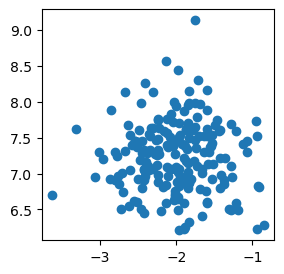

In [35]:
# 2. Visualize this distribution through a scatterplot.
plt.figure(figsize=(3,3))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [ ]:
# 3. Create a One Class SVM classifier to predict the outliers.

In [ ]:
# 4. Visualize the outliers with red color.

# References
__[Dataset loading utilities](https://scikit-learn.org/stable/datasets.html)__
<br>
__[Support Vector Machines](https://scikit-learn.org/stable/modules/svm.html)__
<br>
__[The classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)__
<br>
__[The format() method](https://docs.python.org/3/tutorial/inputoutput.html)__ 
<br>
__[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)__
<br>
__[OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html)__
<br>
__[The make_blobs() function](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)__
<br>
__[]()__

# Evaluation

Please visit the following link for __[Workshop 5 Evaluation](https://app.wooclap.com/PIHHOO?from=event-page)__
<br>
Tell us your opinion about this workshop and how we could become better in the next one.
Your opinion matters!!!)__